# Model Evaluation - English 1

## 0. Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from data_analyzer import DataAnalyzer
from evaluation.model_evaluator import ModelEvaluator
from model import Model

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adamdabkowski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Loading dataset

In [2]:
COVID_PREPROCESSED_DATA_PATH = "/Users/adamdabkowski/PycharmProjects/NLP-Project/data/preprocessed/covid"

In [3]:
data_json = pd.read_json(COVID_PREPROCESSED_DATA_PATH, orient="records", lines=True)

In [4]:
# dataset_1 = data_json.loc[data_json['label'] == 1].head(20)
# dataset_0 = data_json.loc[data_json['label'] == 0].head(20)

dataset_1 = data_json.loc[data_json['label'] == 1].head(476)
dataset_0 = data_json.loc[data_json['label'] == 0].head(476)

dataset = pd.concat([dataset_1, dataset_0])
dataset = dataset.sample(frac=1, random_state=10)

In [5]:
train_data, test_data = train_test_split(dataset, train_size=0.8, random_state=42)

## 2. Loading model

In [6]:
COVID_MODEL_V1_PATH = "NLP-Project/training/notebooks/model/french/union_distilbert_base_multilingual_cased.h5py"

In [7]:
model_covid_v1 = Model.load_saved_model(COVID_MODEL_V1_PATH, useGPU=False)

2023-05-24 23:54:38.858824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /Users/adamdabkowski/PycharmProjects/NLP-Project/model/covid/model_v1.h5py.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


#### 2.1 Train data

Accuracy:   0.98158
Precision:  0.98638
Recall:     0.97574
F1 score:   0.98103




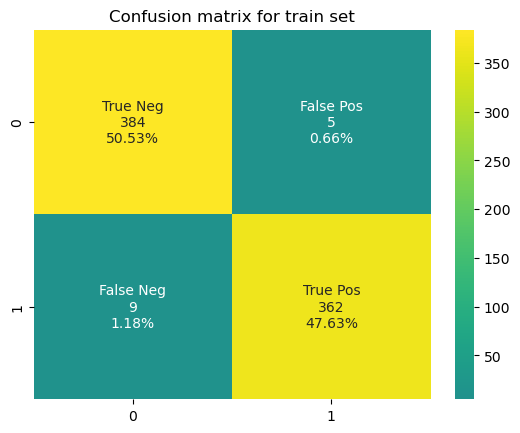

In [8]:
ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=train_data,
    set_type="train"
)

#### 2.2 Test data

Accuracy:   0.97895
Precision:  1.0
Recall:     0.96117
F1 score:   0.9802




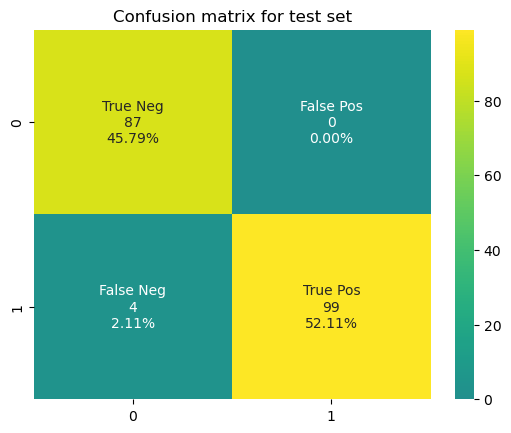

In [9]:
scores, y_true, y_pred = ModelEvaluator.evaluate(
    model=model_covid_v1,
    dataset=test_data,
    set_type="test"
)

In [10]:
test_data_correctly_predicted_model_v1 = ModelEvaluator.get_correctly_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

In [11]:
test_data_false_predicted_model_v1 = ModelEvaluator.get_false_predicted_elements(
    dataset=test_data,
    y_true=y_true,
    y_pred=y_pred
)

## 3. Results Analyzing

#### 3.1 Polarity

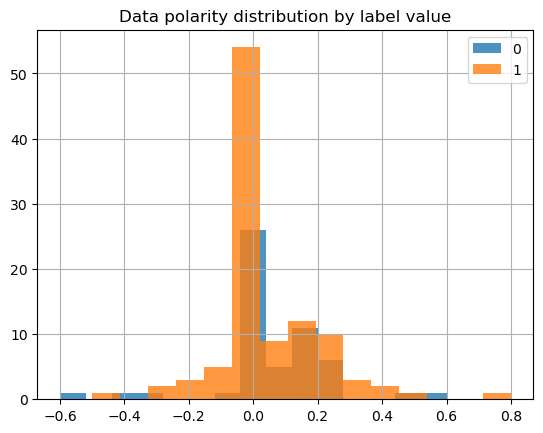

In [12]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_correctly_predicted_model_v1)

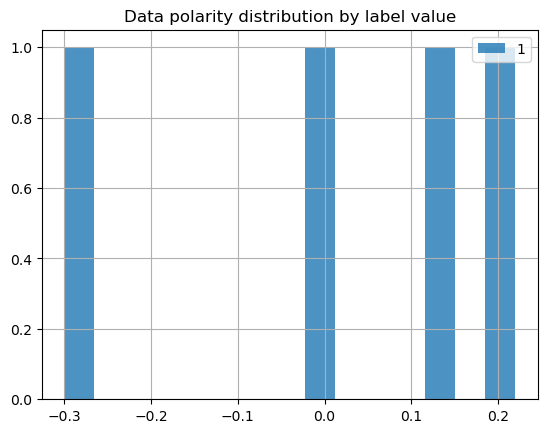

In [13]:
DataAnalyzer.plot_polarity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.2 Subjectivity

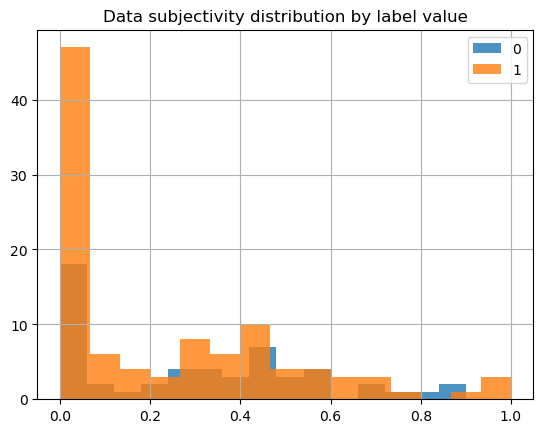

In [14]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_correctly_predicted_model_v1)

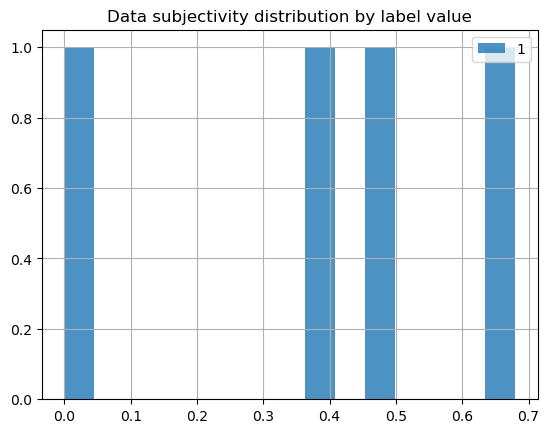

In [15]:
DataAnalyzer.plot_subjectivity_distribution(dataset=test_data_false_predicted_model_v1)

#### 3.3 Most Popular Words map

In [16]:
most_popular_words_correct = DataAnalyzer.get_most_popular_words(
    dataset=test_data_correctly_predicted_model_v1,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

In [17]:
most_popular_words_false = DataAnalyzer.get_most_popular_words(
    dataset=test_data_false_predicted_model_v1,
    language="english",
    most_popular_words_num=100,
    label_type=None
)

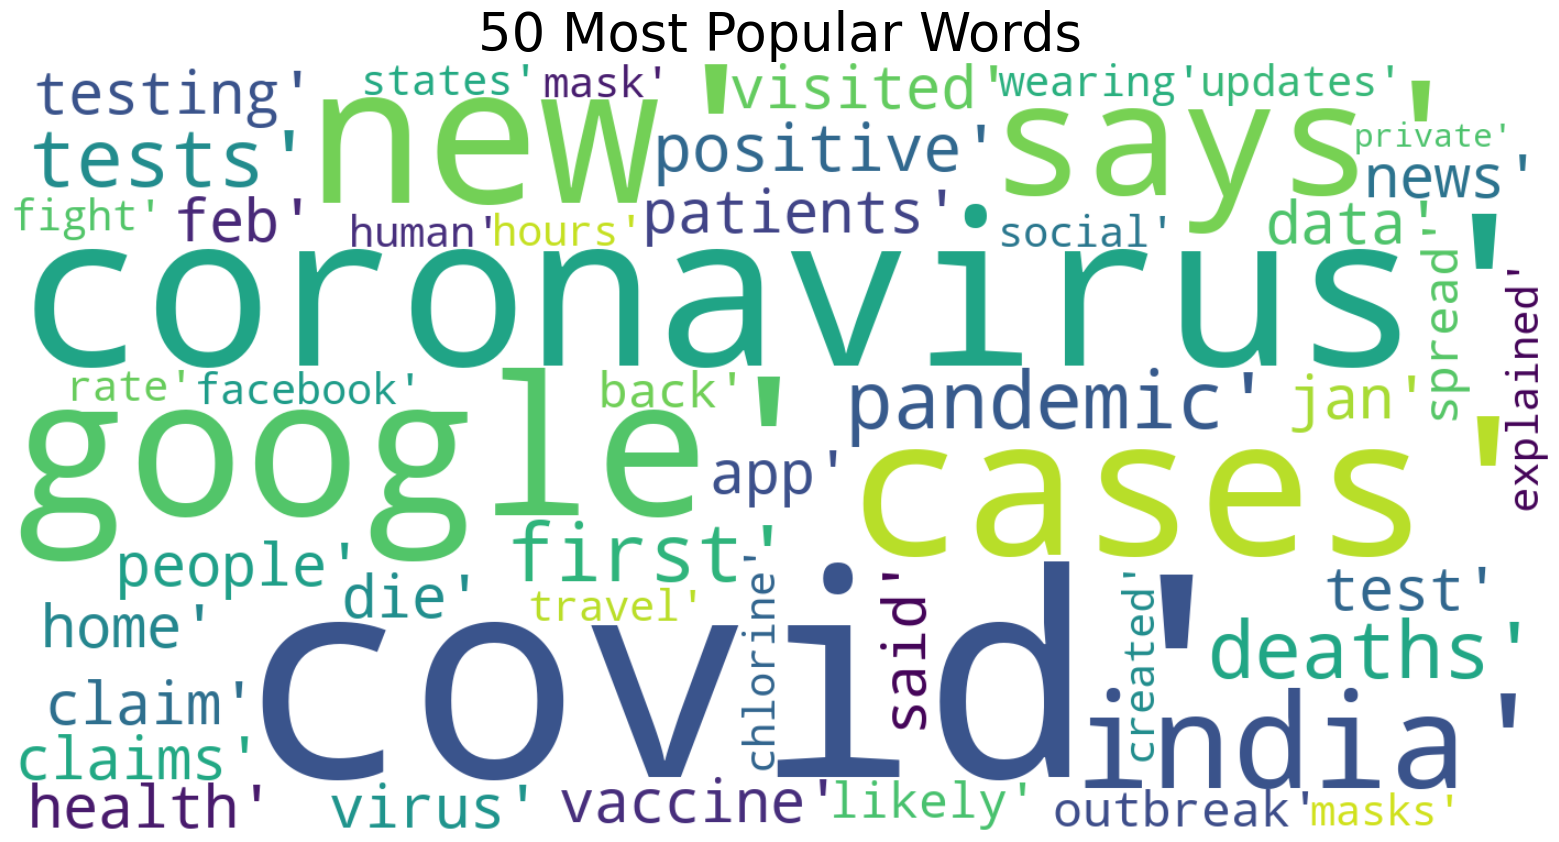

In [18]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=50,
    label_type=None
)

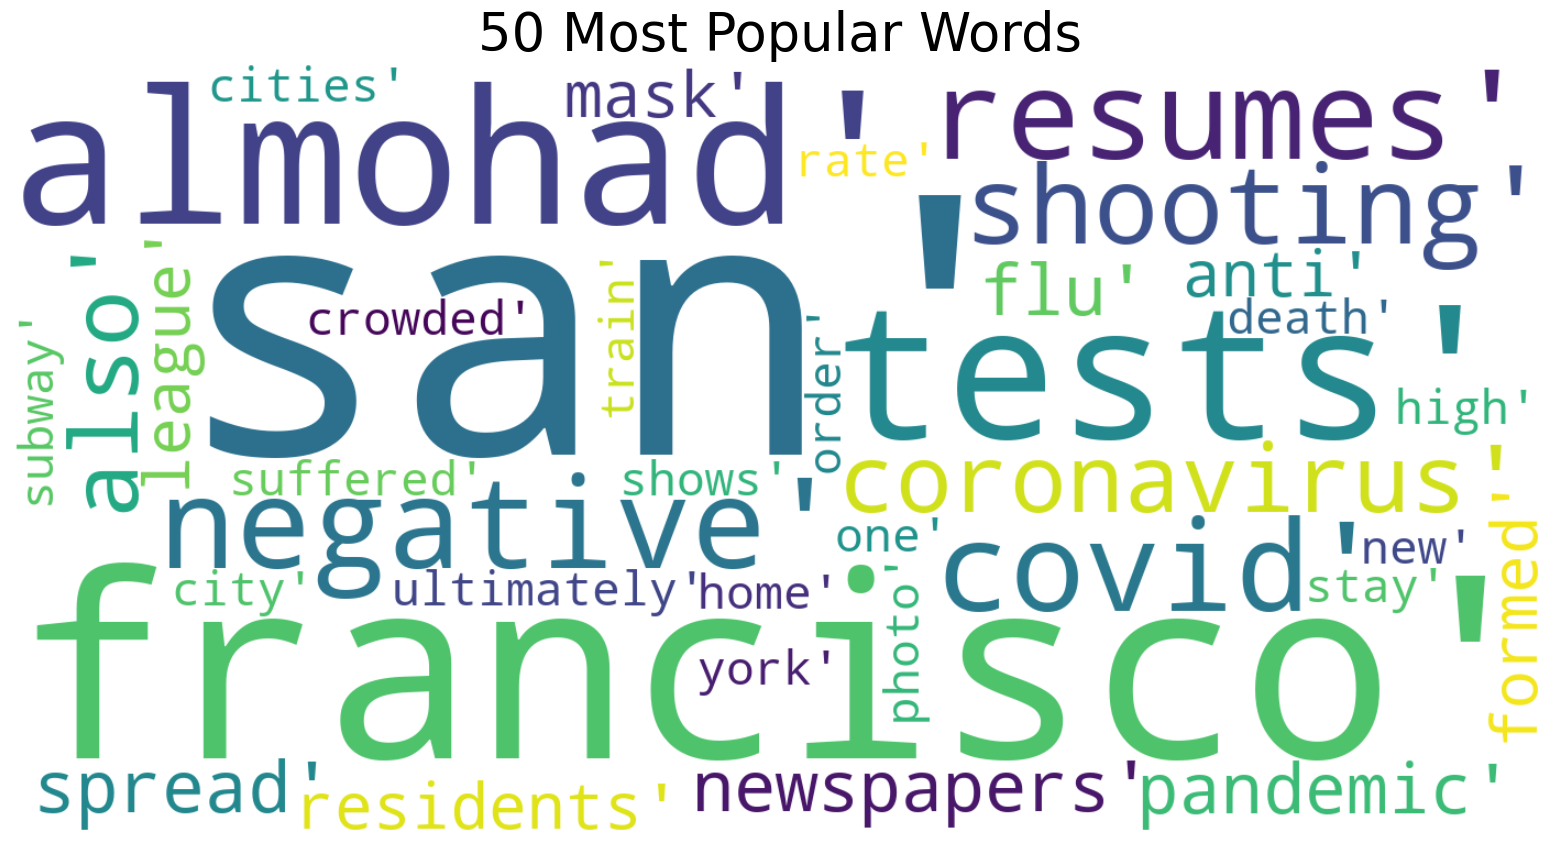

In [19]:
DataAnalyzer.plot_most_popular_words_map(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=50,
    label_type=None
)

#### 3.4 Most Popular Words Histogram

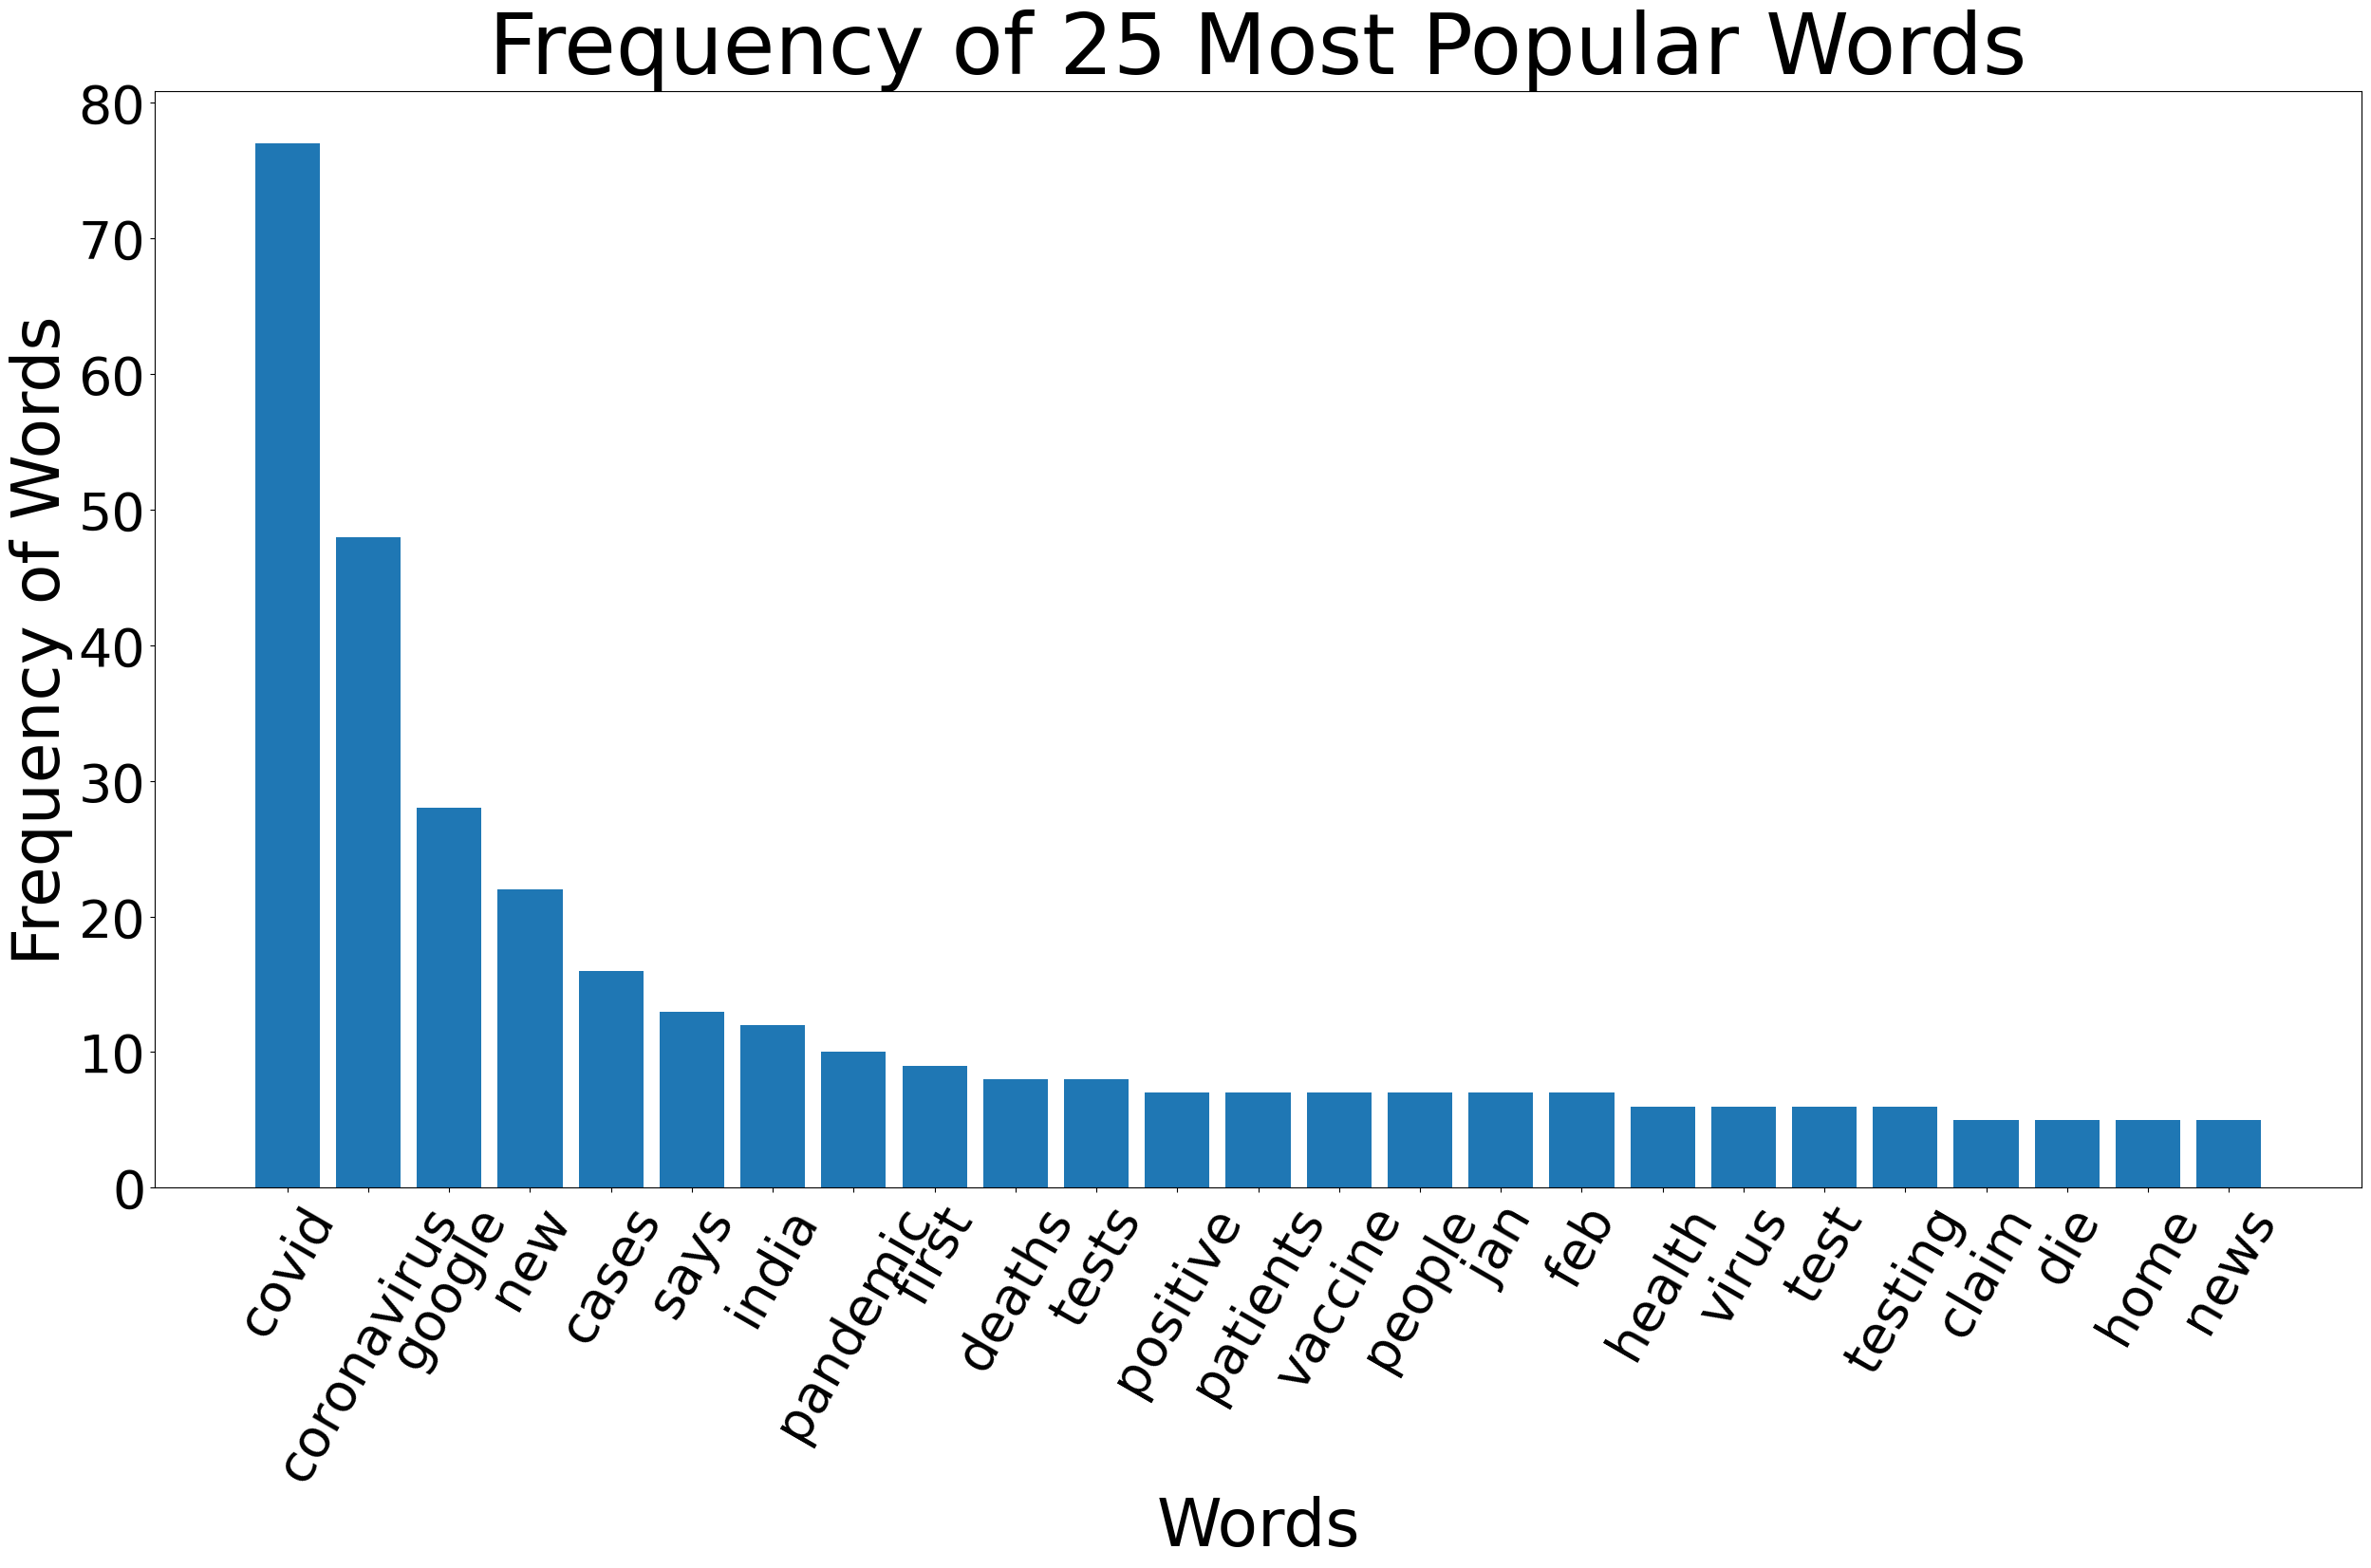

In [20]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_correct,
    most_popular_words_num=25,
    label_type=None
)

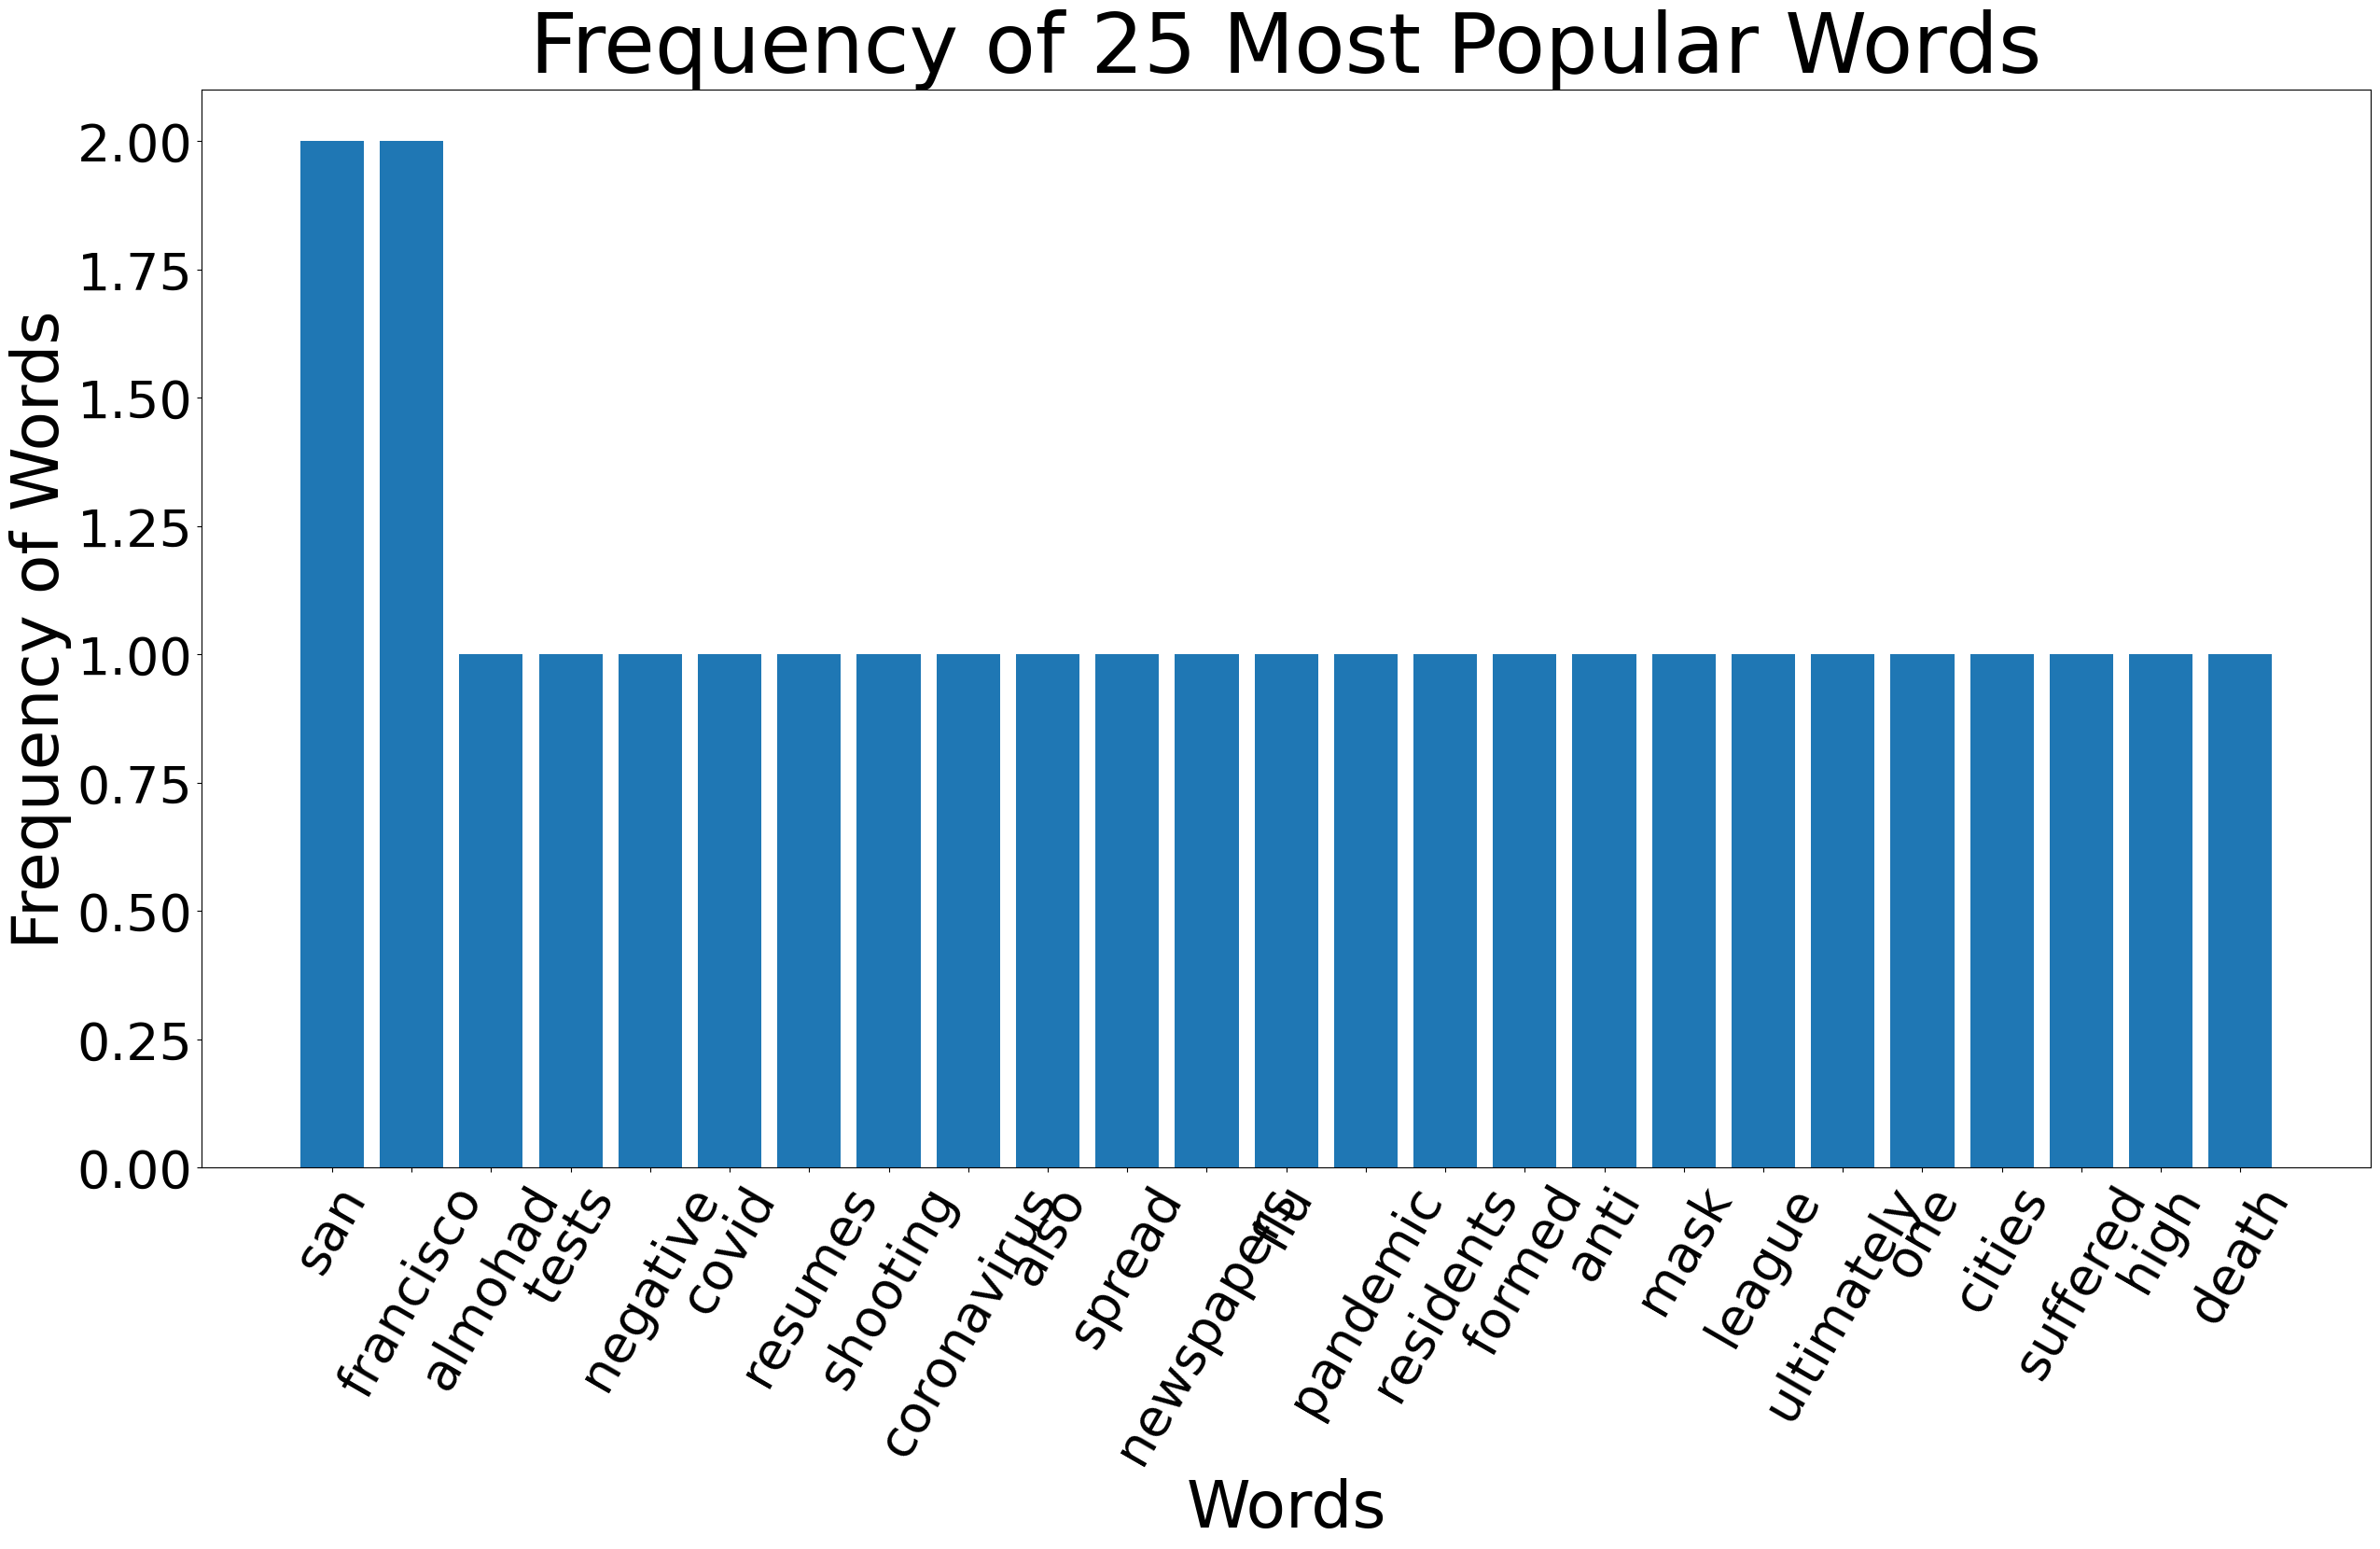

In [21]:
DataAnalyzer.plot_most_popular_words_histogram(
    most_popular_words=most_popular_words_false,
    most_popular_words_num=25,
    label_type=None
)